# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key
weather_api_key = "beb2637993ab05662d743c52f5c57404"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(weather_api_key)

beb2637993ab05662d743c52f5c57404


### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
#  #I added this cell to check individual JSON calls
#  # Set the API base URL
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# # # Define an empty list to fetch the weather data for each city
# city_data = []

# # # Create endpoint URL with each city
# city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

#          # Parse the JSON and retrieve data
# city_weather = requests.get(city_url).json()
# city_weather
#           #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
# city_lat = city_weather["coord"]['lat']
# city_lng = city_weather["coord"]['lon']
# city_max_temp = city_weather["main"]['temp_max']
# city_humidity = city_weather["main"]['humidity']
# city_clouds = city_weather["clouds"]['all']
# city_wind = city_weather["wind"]['speed']
# city_country = city_weather["sys"]['country']
# city_date = city_weather["dt"]

# #         # Append the City information into city_data list
# city_data.append({"City": city, 
#                  "Lat": city_lat, 
#                   "Lng": city_lng, 
#                   "Max Temp": city_max_temp,
#                   "Humidity": city_humidity,
#                   "Cloudiness": city_clouds,
#                   "Wind Speed": city_wind,
#                   "Country": city_country,
#                   "Date": city_date
#                             })

# city_data

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

    # city_weather = requests.get(city_url).json()
    # city_weather
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
         city_weather = requests.get(city_url).json()
         #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
         city_lat = city_weather["coord"]['lat']
         city_lng = city_weather["coord"]['lon']
         city_max_temp = city_weather["main"]['temp_max']
         city_humidity = city_weather["main"]['humidity']
         city_clouds = city_weather["clouds"]['all']
         city_wind = city_weather["wind"]['speed']
         city_country = city_weather["sys"]['country']
         city_date = city_weather["dt"]

#         # Append the City information into city_data list
         city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

     # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
              
 # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | port saint john's
Processing Record 6 of Set 1 | pitimbu
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | sungailiat
Processing Record 10 of Set 1 | rongelap
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | moisei
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | burang
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | carutapera
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | tatishchevo
Processing Record 22 of Set 1 | bandarbeyla
Pro

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,3.93,63,75,5.66,US,1702340946
1,avarua,-21.2078,-159.7750,26.03,83,100,9.77,CK,1702340946
2,waitangi,-43.9535,-176.5597,14.90,91,100,4.02,NZ,1702340946
3,edinburgh of the seven seas,-37.0676,-12.3116,13.89,90,100,9.78,SH,1702340946
4,port saint john's,-31.6229,29.5448,20.43,85,99,1.69,ZA,1702340946


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,3.93,63,75,5.66,US,1702340946
1,avarua,-21.2078,-159.7750,26.03,83,100,9.77,CK,1702340946
2,waitangi,-43.9535,-176.5597,14.90,91,100,4.02,NZ,1702340946
3,edinburgh of the seven seas,-37.0676,-12.3116,13.89,90,100,9.78,SH,1702340946
4,port saint john's,-31.6229,29.5448,20.43,85,99,1.69,ZA,1702340946


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

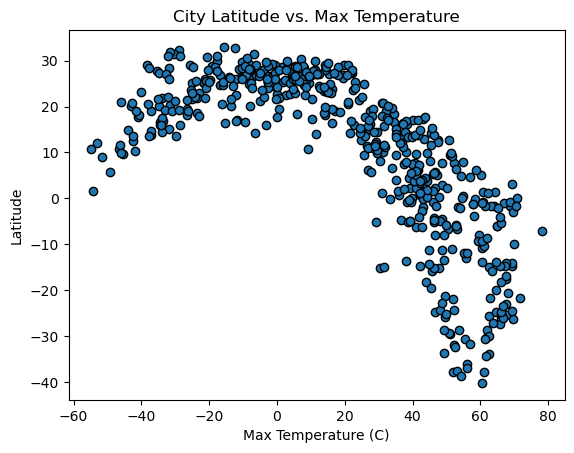

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor= 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Max Temperature (C)')
plt.ylabel('Latitude')

# Save the figure
#plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

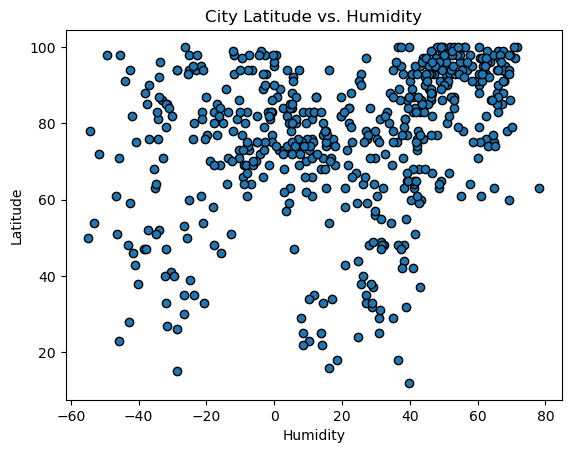

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor= 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Latitude')

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

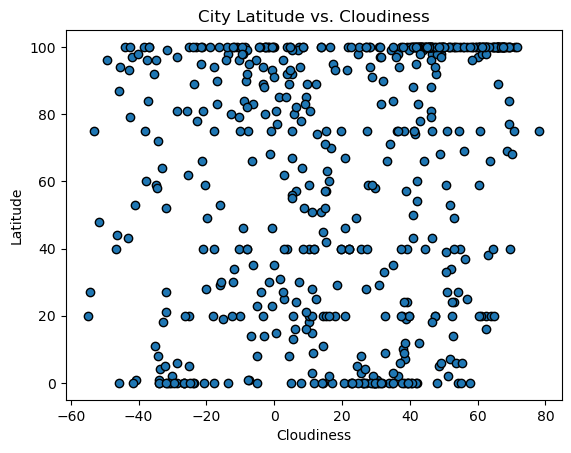

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor= 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')


# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

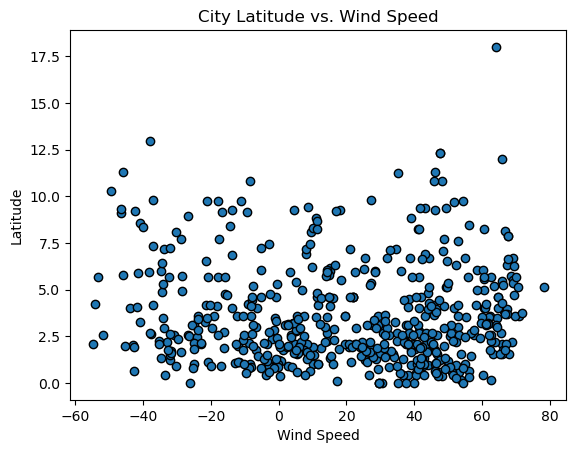

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor= 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
# lat_max_temp_correlation, p_value = st.pearsonr(city_data_df['Lat'], city_data_df['Max Temp'])
# lat_humidity_correlation, p_value = st.pearsonr(city_data_df['Lat'], city_data_df['Humidity'])
# lat_cloudiness_correlation, p_value = st.pearsonr(city_data_df['Lat'], city_data_df['Cloudiness'])
# lat_wind_speed_correlation, p_value = st.pearsonr(city_data_df['Lat'], city_data_df['Wind Speed'])

#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#print(regress_values)

NameError: name 'x_values' is not defined

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head(50)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,3.93,63,75,5.66,US,1702340946
9,rongelap,11.1635,166.8941,27.55,76,51,8.82,MH,1702340947
11,moisei,47.6556,24.5401,0.31,94,92,0.59,RO,1702340948
13,burang,30.2500,81.1667,-15.29,61,1,1.58,CN,1702340948
14,stanley,54.8680,-1.6985,0.44,96,40,1.03,GB,1702340845
16,tura,25.5198,90.2201,14.50,93,8,1.25,IN,1702340949
17,college,64.8569,-147.8028,-6.03,63,100,4.63,US,1702340949
19,thompson,55.7435,-97.8558,-12.91,78,100,5.66,CA,1702340949
20,tatishchevo,51.6703,45.5953,-11.01,67,100,9.69,RU,1702340950


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,26.03,83,100,9.77,CK,1702340946
2,waitangi,-43.9535,-176.5597,14.90,91,100,4.02,NZ,1702340946
3,edinburgh of the seven seas,-37.0676,-12.3116,13.89,90,100,9.78,SH,1702340946
4,port saint john's,-31.6229,29.5448,20.43,85,99,1.69,ZA,1702340946
5,pitimbu,-7.4706,-34.8086,26.33,73,1,5.21,BR,1702340947


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.676640894022477


<function matplotlib.pyplot.show(close=None, block=None)>

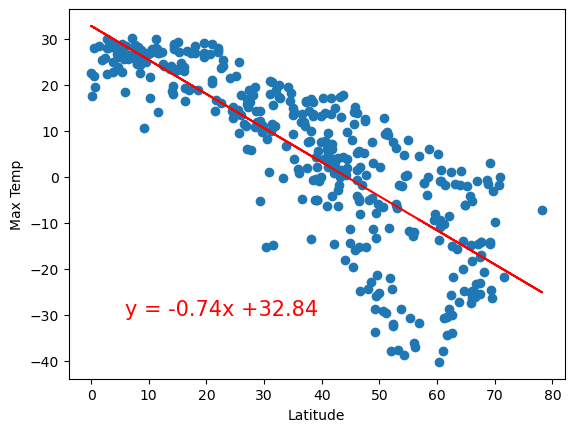

In [50]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,-30.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-value is: {rvalue**2}')
plt.show

The r-value is: 0.3704975243849292


<function matplotlib.pyplot.show(close=None, block=None)>

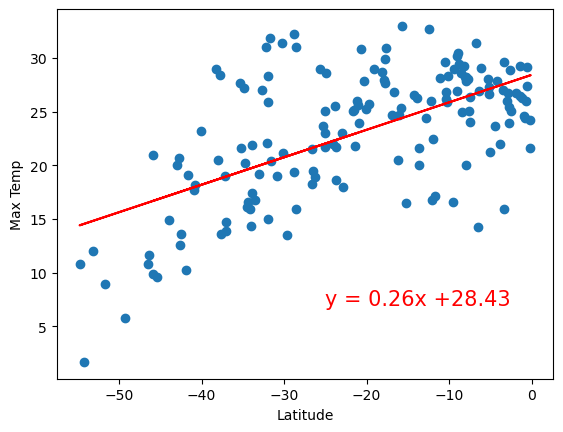

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25.0,7.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-value is: {rvalue**2}')
plt.show

Y**Discussion about the linear relationship:** OUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15437830695984536


<function matplotlib.pyplot.show(close=None, block=None)>

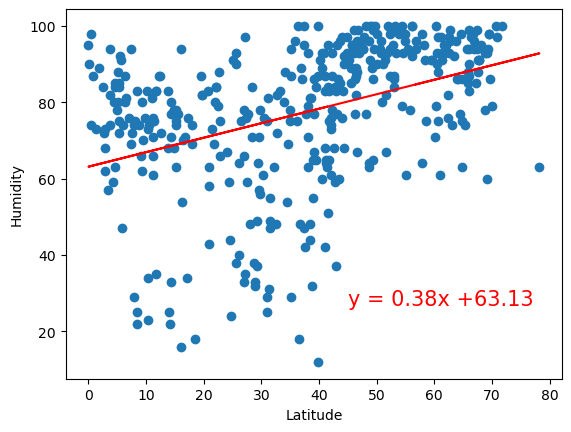

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.0,27.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue**2}')
plt.show

The r-value is: 0.10422751947950402


<function matplotlib.pyplot.show(close=None, block=None)>

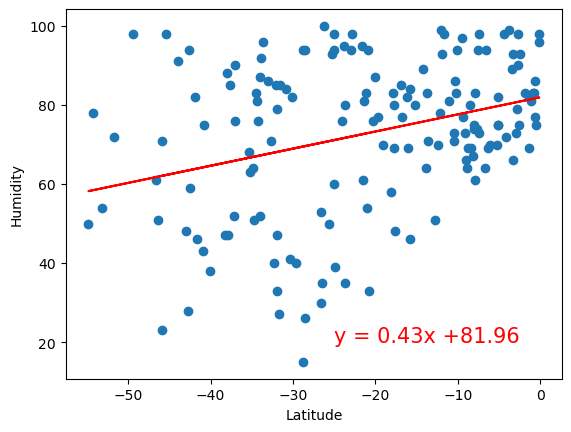

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25.0,20.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue**2}')
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.081326519704105


<function matplotlib.pyplot.show(close=None, block=None)>

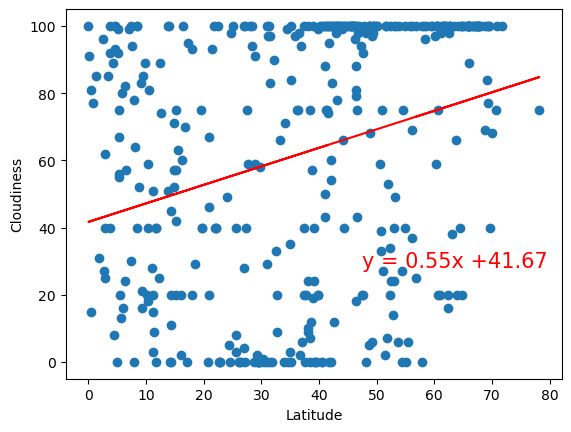

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47.5,28.3),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is: {rvalue**2}')
plt.show

The r-value is: 0.026437645886967117


<function matplotlib.pyplot.show(close=None, block=None)>

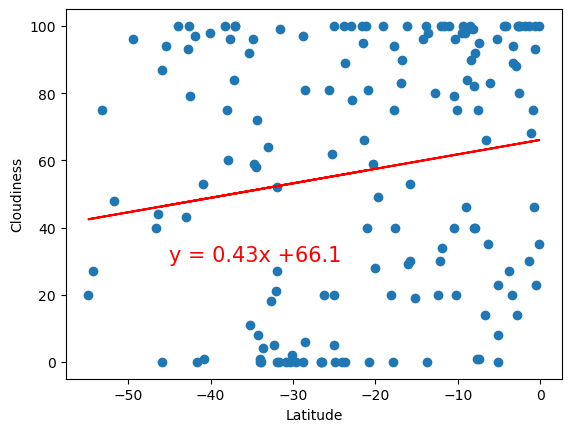

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45.0,30.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is: {rvalue**2}')
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011596786634946727


<function matplotlib.pyplot.show(close=None, block=None)>

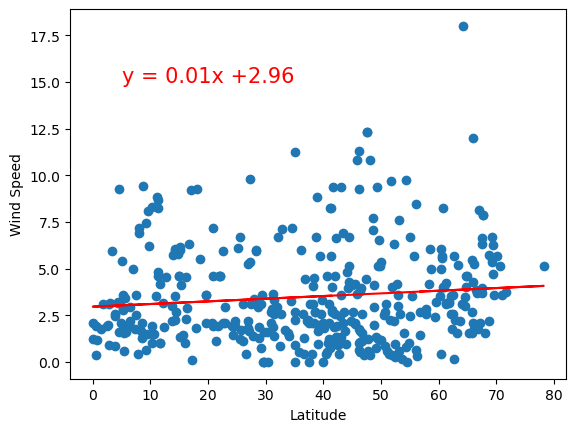

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.0,15.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is: {rvalue**2}')
plt.show

The r-value is: 0.07039033545153735


<function matplotlib.pyplot.show(close=None, block=None)>

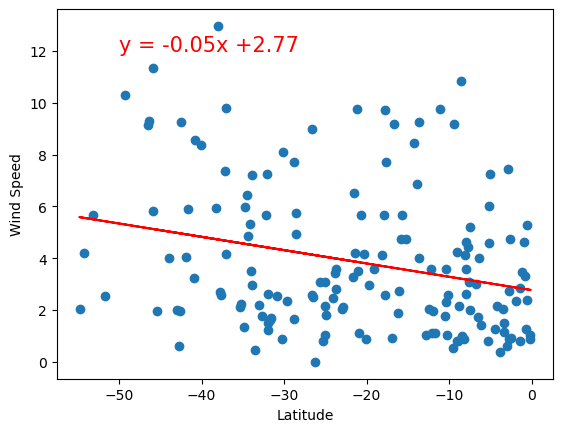

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50.0,12.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is: {rvalue**2}')
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE